# *--------------- Audience Rating Prediction--------- one of worst model i ever build as far now dec/21/2024 and , also this i build for zoho online assignment 😂 what a joke*

 **what we got from datasets:**

  --*from given movie related data we try to predict what's audience rating.*

  --*it's an supervised problem. so using supervised machine learning model we can solve this problem.*

  --*so i used neural network to implement this model*

**Neural Network stucture:**

  --*it has three layer . First layer has 128 neurons and Second layer(hidden layer) has 68 neurons and finally output layer has 1 neuron.*
  
  --*for activation function ,  relu for 1st and 2nd layer and for output layer normal linear function (wx+b). cause the target going to number that takes many(linear regression) . so it's good to use linear function*

  --*optimizer -> adam*


In [ ]:
# import neccessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder,
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim


# when running this notebook make sure insert dataset file
file_path = "Rotten_Tomatoes_Movies3.csv"


In [ ]:
data = pd.read_csv(file_path)
# data.isnull().sum()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15490 entries, 0 to 15489
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         15490 non-null  object 
 1   movie_info          15468 non-null  object 
 2   critics_consensus   7667 non-null   object 
 3   rating              15490 non-null  object 
 4   genre               15474 non-null  object 
 5   directors           15384 non-null  object 
 6   writers             14234 non-null  object 
 7   cast                15227 non-null  object 
 8   in_theaters_date    14733 non-null  object 
 9   on_streaming_date   15487 non-null  object 
 10  runtime_in_minutes  15342 non-null  float64
 11  studio_name         15106 non-null  object 
 12  tomatometer_status  15489 non-null  object 
 13  tomatometer_rating  15489 non-null  float64
 14  tomatometer_count   15489 non-null  float64
 15  audience_rating     15259 non-null  float64
dtypes: f

In [ ]:
# cleaning the datasets --> removing and filling data

data = pd.read_csv(file_path)
data = data.dropna(subset=['audience_rating'])
data = data.fillna(method="ffill")
data.isnull().sum()
# data.head(10)

<ipython-input-9-483dd5c832ad>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


,0
movie_title,0
movie_info,0
critics_consensus,0
rating,0
genre,0
directors,0
writers,0
cast,0
in_theaters_date,0
on_streaming_date,0


In [ ]:
features = ['movie_info', 'critics_consensus', 'rating', 'genre',
            'directors', 'writers', 'cast', 'runtime_in_minutes',
            'studio_name', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count']
target = 'audience_rating'

X = data[features]
y = data[target]


In [ ]:
# data preprocessing --> preparing data for training

categorical_features = ['rating', 'genre', 'directors', 'writers', 'cast', 'studio_name']
numeric_features = ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical features
    ]
)

X[categorical_features] = X[categorical_features].astype(str)
X[numeric_features] = X[numeric_features].astype(float)
X_transformed = preprocessor.fit_transform(X)


<ipython-input-12-61b6cee00ed0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_features] = X[categorical_features].astype(str)
<ipython-input-12-61b6cee00ed0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features] = X[numeric_features].astype(float)


In [ ]:
X_transformed.toarray().shape

(16386, 40144)

In [ ]:
# splitting data 80% for train 20% for test
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state= 42)

# convert target to numpy arrays
y_train = y_train.values
y_test = y_test.values


(13108,)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# define nn model
model = Sequential([
    Dense(128, activation="relu", input_dim= X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="linear"),
])


# compile the model
model.compile(optimizer= 'adam', loss="mean_squared_error", metrics=["mae"])

#train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2) # for compulation reason i only run 5 epoch . if we run 50 epochs we can get good prediction


Epoch 1/5
328/328 ━━━━━━━━━━━━━━━━━━━━ 28s 82ms/step - loss: 2414.3103 - mae: 41.4281 - val_loss: 215.3109 - val_mae: 11.4816
Epoch 2/5
328/328 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - loss: 228.3220 - mae: 11.8975 - val_loss: 210.6032 - val_mae: 11.5188
Epoch 3/5
328/328 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - loss: 168.8208 - mae: 9.9223 - val_loss: 207.4325 - val_mae: 11.4489
Epoch 4/5
328/328 ━━━━━━━━━━━━━━━━━━━━ 28s 86ms/step - loss: 130.8174 - mae: 8.7527 - val_loss: 213.9546 - val_mae: 11.6169
Epoch 5/5
328/328 ━━━━━━━━━━━━━━━━━━━━ 29s 88ms/step - loss: 116.3850 - mae: 8.3186 - val_loss: 218.8811 - val_mae: 11.8031


In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

# Make predictions
y_pred = model.predict(X_test)

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 212.7218 - mae: 11.6701
Test MAE: 11.858222961425781
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


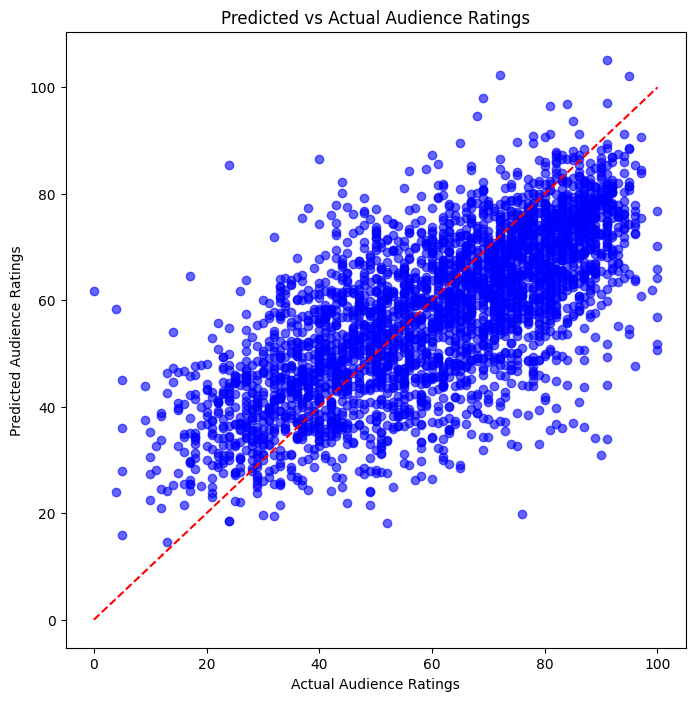

In [ ]:
# prediction vs target

import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 8))
# plt.scatter(y_test, y_pred, color='blue')
# plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line y=x
plt.title('Predicted vs Actual Audience Ratings')
plt.xlabel('Actual Audience Ratings')
plt.ylabel('Predicted Audience Ratings')
plt.show()


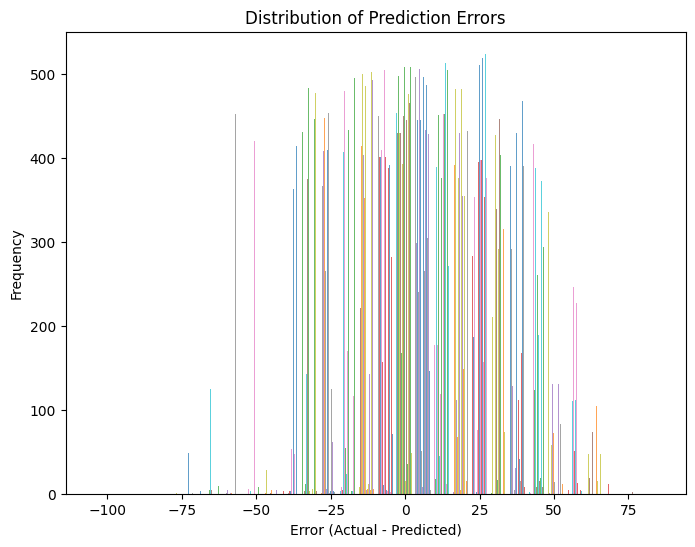

In [ ]:
errors = y_test - y_pred

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, alpha=0.7)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

# -----------------------*Audiences Rating Model (what i did after)  ----------------*
<font color='grey'>-------------------------*prepare data*-------------------


In [ ]:
# file path
file_path = "Rotten_Tomatoes_Movies3.csv"

In [ ]:
# import neccessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else  'cpu'
print("Current device --->", device)

Current device ---> cpu


In [ ]:
# make data as pandas dataframe
data = pd.read_csv(file_path)
data.info()

In [ ]:
# data

In [ ]:
# fill nan fields (i think here i made my first mistake . i shouldn't randomly fill those nan fields)
data_filled =  data.ffill()
data_filled.info()

In [ ]:
data_filled.isnull().sum()

In [ ]:
# all the type of data in dataset
data_types = data.dtypes.unique()
data_types

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [ ]:
object_types = data_filled.select_dtypes(include="object").columns
int_types = data_filled.select_dtypes(include="int64").columns
float_types = data_filled.select_dtypes(include="float64").columns

In [ ]:
object_types

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'studio_name', 'tomatometer_status'],
      dtype='object')

In [ ]:
# prepare data for embedding layer --> (high-cardinality categorical features)

# studio feature
studio_to_idx = {studio:i for i, studio in enumerate(data_filled['studio_name'].unique()) }
idx_to_studio = {i:studio for studio, i in studio_to_idx.items() }
uniq_stu_len =  torch.tensor(len(studio_to_idx), device=device)       # size of the unique categories in studio feature - needed for creating embedding layer
studio_uidx = torch.LongTensor([studio_to_idx[studio] for studio in data_filled['studio_name']], device=device) # embedding this idx to embedding layer

# genre feature
genre_to_idx = {genre:i for i, genre in enumerate(data_filled['genre'].unique()) }
idx_to_genre = {i:genre for genre, i in genre_to_idx.items() }
uniq_gen_len =  torch.tensor(len(genre_to_idx) , device=device)       # size of the unique categories in genre feature - needed for creating embedding layer
genre_uidx = torch.LongTensor([genre_to_idx[genre] for genre in data_filled['genre']], device=device) # embedding this idx to embedding layer


#critics_consensus feature
critics_to_idx = {critics_con:i for i, critics_con in enumerate(data_filled['critics_consensus'].unique()) }
idx_to_critics = {i:critics for critics, i in critics_to_idx.items() }
uniq_critics_len =  torch.tensor(len(critics_to_idx), device=device)       # size of the unique categories in critics_consences feature - needed for creating embedding layer
critics_uidx = torch.LongTensor([critics_to_idx[critics] for critics in data_filled['critics_consensus']], device=device) # embedding this idx to embedding layer

# directors feature
director_to_idx = {director:i for i, director in enumerate(data_filled['directors'].unique()) }
idx_to_director = {i:director for director, i in director_to_idx.items() }
uniq_director_len =  torch.tensor(len(director_to_idx), device=device)       # size of the unique categories in directos feature - needed for creating embedding layer
director_uidx = torch.LongTensor([director_to_idx[director] for director in data_filled['directors']], device=device) # embedding this idx to embedding layer

# cast feature
cast_to_idx = {cast:i for i, cast in enumerate(data_filled['cast'].unique()) }
idx_to_cast = {i:cast for cast, i in cast_to_idx.items() }
uniq_cast_len =  torch.tensor(len(cast_to_idx), device=device)       # size of the unique categories in directos feature - needed for creating embedding layer
cast_uidx = torch.LongTensor([cast_to_idx[cast] for cast in data_filled['cast']], device=device) # embedding this idx to embedding layer


# writers feature
writer_to_idx = {writer:i for i, writer in enumerate(data_filled['writers'].unique()) }
idx_to_writer = {i:writer for writer, i in writer_to_idx.items() }
uniq_writer_len =  torch.tensor(len(writer_to_idx), device=device)       # size of the unique categories in directos feature - needed for creating embedding layer
writers_uidx = torch.LongTensor([writer_to_idx[writer] for writer in data_filled['writers']], device=device) # embedding this idx to embedding layer


uniq_stu_len, uniq_director_len, uniq_gen_len, uniq_critics_len, uniq_cast_len, uniq_writer_len

(tensor(2886),
 tensor(8314),
 tensor(1080),
 tensor(8307),
 tensor(16326),
 tensor(12121))

In [ ]:
def clip_values(X, min=-3, max=3):
  return np.clip(X, min, max)

In [ ]:
# one-hot encoding , only take features that are categorical and numerical

feature_1hot_num = data_filled[['rating', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'runtime_in_minutes']].copy()

categorical_fea = ['rating', 'tomatometer_status']
numerical_fea = ['tomatometer_rating', 'tomatometer_count', 'runtime_in_minutes']

feature_1hot_num[categorical_fea] = feature_1hot_num[categorical_fea].astype(str)
feature_1hot_num[numerical_fea] = feature_1hot_num[numerical_fea].astype(float)

# pipe line for numerical value
numerical_pipeline = Pipeline(steps=[
    ('z1-scaler', StandardScaler()),
    ('clipper', FunctionTransformer(clip_values))
])

# make one-hot encoding for categorical and z1-score for neumerical
pre_1hot_num = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_fea),
        ('num', numerical_pipeline, numerical_fea)
    ]
)



feature_1hot_num_trans = pre_1hot_num.fit_transform(feature_1hot_num)
feature_1hot_num_trans.shape

(16638, 14)

In [ ]:
one_hot_names = pre_1hot_num.named_transformers_['cat'].get_feature_names_out(categorical_fea)
names = list(one_hot_names) + list(numerical_fea)
# how preprocessing changed our data
dftransformed_feature = pd.DataFrame(feature_1hot_num_trans, columns=names)
dftransformed_feature.describe()


In [ ]:
# feature_1hot_num[numerical_fea].describe()
# max(feature_1hot_num_trans[:, 13])

plt.hist(feature_1hot_num_trans[:, 13] , bins=100)
plt.show()

In [ ]:
# make other one-hot and numerical feature as tensor
other_hf =  torch.tensor(feature_1hot_num_trans, dtype=torch.float32, device=device)
# target audience rating
y = torch.tensor(data_filled['audience_rating'], dtype=torch.float32, device=device)
y.dim(), y.shape
yt = y / 1000 # target normalized
yt =  torch.unsqueeze(yt, dim=1)

In [ ]:
# ----------------------------------spliting dataset for training, dev, test--------------------------

m = 16638 # total number of examples in dataset

n1 = int(m * 0.7)
n2 = n1 + int(m * 0.15)

# features
studio_tr, studio_dev, studio_te = studio_uidx[: n1], studio_uidx[n1:n2], studio_uidx[n2: ]
genre_tr, genre_dev, genre_te = genre_uidx[: n1], genre_uidx[n1:n2], genre_uidx[n2: ]

directors_tr, directors_dev, directors_te = director_uidx[: n1], director_uidx[n1:n2], director_uidx[n2: ]
writers_tr, writers_dev, writers_te = writers_uidx[: n1], writers_uidx[n1:n2], writers_uidx[n2: ]
cast_tr, cast_dev, cast_te = cast_uidx[: n1], cast_uidx[n1:n2], cast_uidx[n2: ]
critics_tr, critics_dev, critics_te = critics_uidx[: n1],  critics_uidx[n1:n2], critics_uidx[n2: ]

other_hf_tr, other_hf_dev, other_hf_te = other_hf[: n1],  other_hf[n1:n2], other_hf[n2: ]

# target
ytr, ydev, yte =  yt[:n1], yt[n1:n2], yt[n2:]

# -------------------------- *JUST MAKE SOME PROGRESS(examples model scartches) ---------------*

In [ ]:

num_emb = 16338
emb_dim_1 = 10

# embedding layer with 10 dimention for features studio, genre
studio_emb = nn.Embedding(uniq_stu_len, emb_dim_1 , device=device)
genre_emb = nn.Embedding(uniq_gen_len, emb_dim_1, device=device)

# embedding layer with 30 dimention for features director, critics, cast, writer
emb_dim_2 = 30
director_emb = nn.Embedding(uniq_director_len, emb_dim_2, device=device)
critics_emb = nn.Embedding(uniq_critics_len, emb_dim_2, device=device)
cast_emb = nn.Embedding(uniq_cast_len, emb_dim_2, device=device)
writer_emb = nn.Embedding(uniq_writer_len, emb_dim_2, device=device)


#total num of parametrs
total_params = sum(p.numel() for layer in [studio_emb, genre_emb, director_emb,cast_emb, critics_emb, writer_emb] for p in layer.parameters() )
print(f"Total num of parameters in embedding layer : {total_params}")

# enable gradient
for layer in [studio_emb, genre_emb, director_emb,cast_emb, critics_emb, writer_emb]:
  for p in layer.parameters():
    p.requires_grad = True

In [ ]:
other_hf =  torch.tensor(feature_1hot_num_trans, dtype=torch.float32, device=device)

In [ ]:
# target audience rating
y = torch.tensor(data_filled['audience_rating'], dtype=torch.float32, device=device)
y.dim(), y.shape
yt = y / 1000 # target normalized
yt =  torch.unsqueeze(yt, dim=1)

In [ ]:
fan_in = (emb_dim_1 * 2) + (emb_dim_2 * 4) + (other_hf.size(1))        # input size
hidden_n = 200                                                      # hidden size - neurons in layer
fan_o = 1                                                             # output size

g = torch.Generator().manual_seed(21474823647)                        # generator for reproducibilty

W1 = torch.randn((fan_in, hidden_n), device=device, generator=g) * (torch.sqrt(torch.tensor(2)) / torch.sqrt(torch.tensor(fan_in)) ) **2
b1 = torch.randn((hidden_n), device=device, generator=g) * 0.0 #(torch.sqrt(torch.tensor(2)) / torch.sqrt(torch.tensor(fan_in)) ) **2

W2 = torch.randn((hidden_n, fan_o), device=device, generator=g) * (torch.sqrt(torch.tensor(2)) / torch.sqrt(torch.tensor(hidden_n)) ) **2
b2 = torch.randn((fan_o, ), device=device, generator=g) * 0.0 #(torch.tensor(1) / torch.sqrt(torch.tensor(hidden_n))) ** 2

# batch norm params
# gama = torch.ones((1, hidden_n) , device=device)
# beta = torch.zeros((1, hidden_n), device=device)

# running_mean = torch.zeros((1, hidden_n), device=device)
# running_var = torch.ones((1, hidden_n), device= device)


parameters = [ W1, b1, W2, b2]
print(f"Number of parameters :{sum(p.nelement() for p in parameters)}")

for p in parameters:
  p.requires_grad = True

In [ ]:
W1.shape, b1.shape, W2.shape, b2.shape

In [ ]:
batch_size = 64
lossi = []
epochs = 5000
lamda = 0.1
eps = 1e-5
momentum = 0.1

# optimaization

for epoch in range(epochs):

  ix = torch.randint(0, ytr.shape[0], (batch_size, ),  device=device, generator=g)
  # embedding into vector
  stu =  studio_emb(studio_tr[ix])
  cast =  cast_emb(cast_tr[ix])
  dir =  director_emb(directors_tr[ix])
  wri =  writer_emb(writers_tr[ix])
  genre =  genre_emb(genre_tr[ix])
  crit = critics_emb(critics_tr[ix])
  # other features
  oh =  other_hf_tr[ix]

  X =  torch.cat([stu, cast, dir, wri, genre, crit, oh], dim=1)

  # forward pass
  preact = X @ W1 + b1
  # batch norm
  # mean = preact.mean(0,  keepdim = True)
  # var = preact.var(0, keepdim= True)
  # preact =   gama * ((preact - mean) / torch.sqrt(var + eps) ) + beta

  # # # buffers
  # with torch.no_grad():
  #   running_mean = (1 - momentum ) * running_mean + (momentum * mean )
  #   running_var = (1 - momentum ) * running_var + (momentum * var)

  ract = torch.relu(preact)
  yhat = ract @ W2 + b2

  # compute loss
  loss =  F.mse_loss(yhat, ytr[ix])
  reg = (lamda / (2 * ytr.size(0))) * (torch.sum(W1 ** 2) + torch.sum(W2 ** 2 ))
  loss += reg

  # backward pass
  for p in parameters:
    p.grad = None

  for layer in [studio_emb, genre_emb, director_emb,cast_emb, critics_emb, writer_emb]:
    for p in layer.parameters():
      p.grad = None

  loss.backward()

  # update parameters
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  for layer in [studio_emb, genre_emb, director_emb,cast_emb, critics_emb, writer_emb]:
    for p in layer.parameters():
      p.data *= -lr * p.grad


  if epoch % 500 == 0:
    print(f"{epoch}/{epochs} Loss : {loss.item():.4f}")
  # break
  lossi.append(loss.item())


0/5000 Loss : 0.0032
500/5000 Loss : 0.0003
1000/5000 Loss : 0.0002
1500/5000 Loss : 0.0003
2000/5000 Loss : 0.0003
2500/5000 Loss : 0.0003
3000/5000 Loss : 0.0003
3500/5000 Loss : 0.0002
4000/5000 Loss : 0.0003
4500/5000 Loss : 0.0003


In [ ]:
plt.plot(torch.arange(len(lossi)), lossi)
plt.xlabel('epochs')

plt.ylabel('Loss')

In [ ]:
# how data are distriputed inside net
plt.hist(preact.view(-1).tolist(), bins=50)
plt.show()

In [ ]:
# cross validation dataset

@torch.no_grad()
def split_loss(mode):
  stu, cast, dir, wri, genre, crit, oh, y = None, None, None, None, None, None, None, None

  if mode == 'dev':
    stu =  studio_emb(studio_dev)
    cast =  cast_emb(cast_dev)
    dir =  director_emb(directors_dev)
    wri =  writer_emb(writers_dev)
    genre =  genre_emb(genre_dev)
    crit = critics_emb(critics_dev)
    # other features
    oh =  other_hf_dev

    y = ydev
  elif mode == 'train':
    stu =  studio_emb(studio_tr)
    cast =  cast_emb(cast_tr)
    dir =  director_emb(directors_tr)
    wri =  writer_emb(writers_tr)
    genre =  genre_emb(genre_tr)
    crit = critics_emb(critics_tr)
    # other features
    oh =  other_hf_tr

    y = ytr


  X =  torch.cat([stu, cast, dir, wri, genre, crit, oh], dim=1)

  z1 = X @ W1 + b1

  # batch buffers
  # z1 =   gama * ((z1 - running_mean) / running_var ) + beta

  a1 = torch.relu(z1)
  z2 = a1 @ W2 + b2

  loss = F.mse_loss(z2, y)
  print(f"{mode} : {loss.item():.4f}")

split_loss('dev')
split_loss('train')


dev : 0.0002
train : 0.0002


In [ ]:

def predict(size=5):

  ix = torch.randint(0, yt.shape[0], (size, ),  device=device, generator=g)
    # embedding into vector
  stu =  studio_emb(studio_uidx[ix])
  cast =  cast_emb(cast_uidx[ix])
  dir =  director_emb(director_uidx[ix])
  wri =  writer_emb(writers_uidx[ix])
  genre =  genre_emb(genre_uidx[ix])
  crit = critics_emb(critics_uidx[ix])
    # other features
  oh =  other_hf[ix]
    # cancate features
  X =  torch.cat([stu, cast, dir, wri, genre, crit, oh], dim=1)

  z1 = X @ W1 + b1

  a1 = torch.relu(z1)
  z2 = a1 @ W2 + b2
  print(f"Actual Movie Rating : {(yt[ix] * 1000 ).view(-1).tolist() } \nPrediction          : { torch.ceil(z2 * 1000).view(-1).tolist()}" )

predict(size= 15)

Actual Movie Rating : [57.0, 69.0, 75.0, 89.0, 70.0, 85.0, 37.0, 51.0, 54.0, 24.0, 80.0, 73.0, 58.0, 54.0, 92.0] 
Prediction          : [69.0, 66.0, 69.0, 75.0, 46.0, 54.0, 44.0, 39.0, 72.0, 42.0, 75.0, 68.0, 47.0, 67.0, 72.0]


#<font color='sky blue'>----------------------------------*FINNAL IMPLEMENTATION in PYTORCH WAY---------------------------*

In [ ]:
#                             ------------- EMBEDDING LAYERS ----------------

def embeddings():
  num_emb = 16338
  emb_dim_1 = 10

  # embedding layer with 10 dimention for features studio, genre
  studio_emb = nn.Embedding(uniq_stu_len, emb_dim_1 , device=device)
  genre_emb = nn.Embedding(uniq_gen_len, emb_dim_1, device=device)

  # embedding layer with 30 dimention for features director, critics, cast, writer
  emb_dim_2 = 30
  director_emb = nn.Embedding(uniq_director_len, emb_dim_2, device=device)
  critics_emb = nn.Embedding(uniq_critics_len, emb_dim_2, device=device)
  cast_emb = nn.Embedding(uniq_cast_len, emb_dim_2, device=device)
  writer_emb = nn.Embedding(uniq_writer_len, emb_dim_2, device=device)


  #total num of parametrs
  total_params = sum(p.numel() for layer in [studio_emb, genre_emb, director_emb,cast_emb, critics_emb, writer_emb] for p in layer.parameters() )
  print(f"Total num of parameters in embedding layer : {total_params}")

In [ ]:
# Model
class Model(nn.Module):

  def __init__(self, fan_in, fan_out, hidden_n):
    super().__init__()

    # hidden layer 1
    self.linear1 = nn.Linear(fan_in, hidden_n)  # 150 neuron
    self.relu1 = nn.ReLU()
    # hidden layer 2
    self.linear2 = nn.Linear(hidden_n, 64)      # 64 neuron
    self.relu2 = nn.ReLU()
    # hidden layer 3
    self.linear3 = nn.Linear(64, 32)            # 32 neuron
    self.relu3 = nn.ReLU()
    # output layer
    self.linear4 = nn.Linear(32, fan_out)       # 1 neuron

    # re-initialaizing  weights and bias
    nn.init.kaiming_normal_(self.linear1.weight, mode='fan_in', nonlinearity='relu', generator=g)  # layer 1
    nn.init.constant_(self.linear1.bias, 0.0)

    nn.init.kaiming_normal_(self.linear2.weight, mode='fan_in', nonlinearity='relu', generator=g)  # layer 2
    nn.init.constant_(self.linear2.bias, 0.0)

    nn.init.kaiming_normal_(self.linear3.weight, mode='fan_in', nonlinearity='relu', generator=g)  # layer 3
    nn.init.constant_(self.linear3.bias, 0.0)

    nn.init.kaiming_normal_(self.linear4.weight, mode='fan_in', nonlinearity='relu', generator=g)  # layer 3
    nn.init.constant_(self.linear4.bias, 0.0)

  def forward(self, x):
    # activation layer 1
    preact = self.linear1(x)
    ract1 = self.relu1(preact)
    # activation layer 2
    preact2  = self.linear2(ract1)
    ract2  = self.relu2(preact2)
    # activation layer 2
    preact3  = self.linear3(ract2)
    ract3  = self.relu3(preact3)
    # ouput
    yhat = self.linear4(ract3)
    return yhat


In [ ]:
# initialiazing model
fan_in = (emb_dim_1 * 2) + (emb_dim_2 * 4) + (other_hf.size(1))        # input size
hidden_n = 150                                                         # hidden size - neurons in layer
fan_out = 1

model = Model(fan_in, fan_out, hidden_n).to(device)
optimizer =  optim.SGD([
    {'params': studio_emb.parameters()},
    {'params': cast_emb.parameters()},
    {'params': genre_emb.parameters()},
    {'params': writer_emb.parameters()},
    {'params': director_emb.parameters()},
    {'params': critics_emb.parameters()},
    {'params': model.parameters()}
],lr= 0.01 ,weight_decay = 1e-04, momentum=0.8)

# optimizer =  optim.Adam([
#     {'params': studio_emb.parameters()},
#     {'params': cast_emb.parameters()},
#     {'params': genre_emb.parameters()},
#     {'params': writer_emb.parameters()},
#     {'params': director_emb.parameters()},
#     {'params': critics_emb.parameters()},
#     {'params': model.parameters()}
# ],lr= 0.01, weight_decay= 0.001)
criterion = nn.MSELoss()

embeddings()
print("parameters", sum(p.nelement() for p in model.parameters()))

Total num of parameters in embedding layer : 1391700
parameters 35027


In [ ]:
# optimization loop
batch_size = 64
epochs = 10001
lossi = []
iteri = []


for epoch in range(epochs):
  ix = torch.randint(0, ytr.shape[0], (batch_size, ),  device=device, generator=g)
  # embedding into vector
  stu =  studio_emb(studio_tr[ix])
  cast =  cast_emb(cast_tr[ix])
  dir =  director_emb(directors_tr[ix])
  wri =  writer_emb(writers_tr[ix])
  genre =  genre_emb(genre_tr[ix])
  crit = critics_emb(critics_tr[ix])
  # other features
  oh =  other_hf_tr[ix]

  X =  torch.cat([stu, cast, dir, wri, genre, crit, oh], dim=1)
  # forward pass
  yhat = model(X)
  loss = criterion(yhat, yt[ix])

  # bacward pass
  optimizer.zero_grad()
  loss.backward()
  # update params
  optimizer.step()

  if epoch % 500 == 0:
    print(f"{epoch}/{epochs} Loss : {loss.item()}")
  # break
  lossi.append(loss.item())
  iteri.append(epoch)

0/10001 Loss : 0.0223226360976696
500/10001 Loss : 0.0004354719421826303
1000/10001 Loss : 0.0004171253531239927
1500/10001 Loss : 0.0004061460786033422
2000/10001 Loss : 0.00025618457584641874
2500/10001 Loss : 0.00035103876143693924
3000/10001 Loss : 0.00023796975438017398
3500/10001 Loss : 0.0002969939960166812
4000/10001 Loss : 0.00028103587101213634
4500/10001 Loss : 0.00037618359783664346
5000/10001 Loss : 0.00024219574697781354
5500/10001 Loss : 0.00022676651133224368
6000/10001 Loss : 0.00026655016699805856
6500/10001 Loss : 0.0002513212675694376
7000/10001 Loss : 0.00020182460139039904
7500/10001 Loss : 0.00021160690812394023
8000/10001 Loss : 0.00024939808645285666
8500/10001 Loss : 0.00022720321430824697
9000/10001 Loss : 0.000298137980280444
9500/10001 Loss : 0.00019018152670469135
10000/10001 Loss : 0.00022856172290630639


Text(0, 0.5, 'Loss')

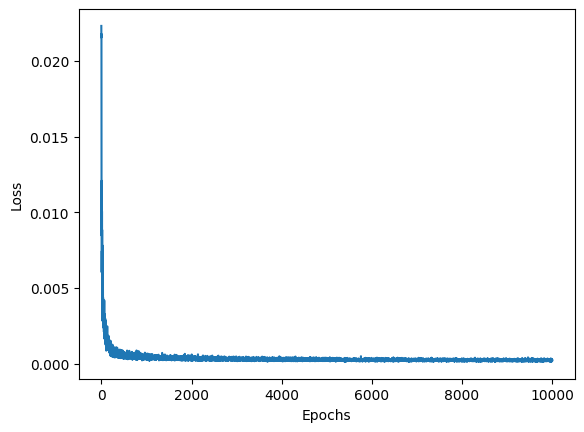

In [ ]:
plt.plot(iteri, lossi)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
# cross validation dataset

@torch.no_grad()
def split_loss(mode):
  stu, cast, dir, wri, genre, crit, oh, y = None, None, None, None, None, None, None, None

  if mode == 'dev':
    stu =  studio_emb(studio_dev)
    cast =  cast_emb(cast_dev)
    dir =  director_emb(directors_dev)
    wri =  writer_emb(writers_dev)
    genre =  genre_emb(genre_dev)
    crit = critics_emb(critics_dev)
    # other features
    oh =  other_hf_dev
    y = ydev
  elif mode == 'train':
    stu =  studio_emb(studio_tr)
    cast =  cast_emb(cast_tr)
    dir =  director_emb(directors_tr)
    wri =  writer_emb(writers_tr)
    genre =  genre_emb(genre_tr)
    crit = critics_emb(critics_tr)
    # other features
    oh =  other_hf_tr
    y = ytr

  X =  torch.cat([stu, cast, dir, wri, genre, crit, oh], dim=1)
  # batch buffers
  # z1 =   gama * ((z1 - running_mean) / running_var ) + beta

  yh =  model(X)
  loss = criterion(yh, y)
  print(f"{mode} : {loss.item()}")

split_loss('dev')
split_loss('train')


dev : 0.000265284936176613
train : 0.0002283841313328594


In [ ]:
# dev : 0.0013961831573396921
# train : 0.0012561952462419868

# dev : 0.0004468696715775877
# train : 0.00040302122943103313

# dev : 0.00029506650753319263
# train : 0.00027019515982829034

# adam
# dev : 0.00024473556550219655
# train : 0.00022640540555585176

# sgd
# dev : 0.00026352619170211256
# train : 0.00019068519759457558

# model with arthitecture changed
# dev : 0.0002495909866411239
# train : 0.0002214339328929782

Actual Movie Rating : [69.0, 29.0, 39.0, 93.0, 71.0, 18.0, 85.0, 75.0, 84.0, 71.0, 53.0, 47.0, 62.0, 23.0, 59.0] 
Prediction          : [77.0, 45.0, 43.0, 97.0, 73.0, 47.0, 72.0, 69.0, 87.0, 63.0, 71.0, 45.0, 52.0, 36.0, 59.0]


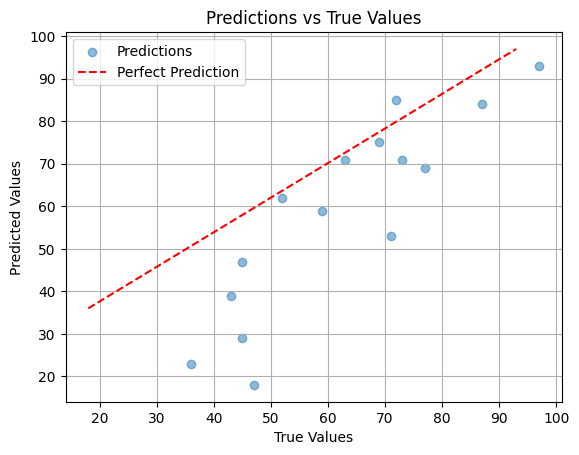

In [ ]:
# ----------------------- Let's try some random sampling -----------------------

def predict(size=5):
  ix = torch.randint(0, yt.shape[0], (size, ),  device=device, generator=g)
    # embedding into vector
  stu =  studio_emb(studio_uidx[ix])
  cast =  cast_emb(cast_uidx[ix])
  dir =  director_emb(director_uidx[ix])
  wri =  writer_emb(writers_uidx[ix])
  genre =  genre_emb(genre_uidx[ix])
  crit = critics_emb(critics_uidx[ix])
    # other features
  oh =  other_hf[ix]
    # cancate features
  X =  torch.cat([stu, cast, dir, wri, genre, crit, oh], dim=1)

  z2 = model(X)

  ypredict = (yt[ix] * 1000 ).view(-1).detach()
  ytarget = torch.ceil(z2 * 1000).view(-1).detach()

  print(f"Actual Movie Rating : {(yt[ix] * 1000 ).view(-1).tolist() } \nPrediction          : { torch.ceil(z2 * 1000).view(-1).tolist()}" )

  draw(ytarget, ypredict)
predict(size= 15)


# Points near the diagonal line represent accurate predictions.
# Points far from the diagonal indicate prediction that not good.


In [ ]:
def draw(ytarget, ypredict):
  plt.scatter(ytarget, ypredict,alpha=0.5,  label='Predictions')
  plt.plot([ypredict.min(), ypredict.max()], [ytarget.min(), ytarget.max()], 'r--', label='Perfect Prediction')
  plt.xlabel('True Values')
  plt.ylabel('Predicted Values')
  plt.title('Predictions vs True Values')
  plt.legend()
  plt.grid()
  plt.show()


In [ ]:
# -----------------------   THAT'S ALL TEST OUR MODEL ------------------

In [ ]:
# test dataset

@torch.no_grad()
def split_loss(mode):
  stu =  studio_emb(studio_te)
  cast =  cast_emb(cast_te)
  dir =  director_emb(directors_te)
  wri =  writer_emb(writers_te)
  genre =  genre_emb(genre_te)
  crit = critics_emb(critics_te)
  # other features
  oh =  other_hf_te
  y = yte

  X =  torch.cat([stu, cast, dir, wri, genre, crit, oh], dim=1)

  yhat =  model(X)
  loss = criterion(yhat, y)
  mae = mean_absolute_error(y, yhat)

  print(f"MSE --> {mode} Loss : {loss.item()}\nMAE --> Test Loss : {mae}")
split_loss('Test')

MSE --> Test Loss : 0.0002453021297696978
MAE --> Test Loss : 0.012482557576492841
